In [523]:
import numpy as np
import qutip as qt
from src import qutrit
from src import functions
import scipy.integrate as integrate

import basic_qubit_drive

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [524]:
epsilons = np.arange(10,200,10, dtype = float)

In [552]:
epsilon_fidelities = []
for epsilon_x in epsilons:
    t_pulse = 1

    eps_x_fun, deps_x_fun, eps_y_fun = functions.cos_pulse_functions(t_pulse, epsilon_x)

    params = {}
    params['omega'] = 5000 #MHz
    params['alpha'] = -300 #MHz
    params['drive_omega'] = 5000 #MHz
    params['lambda_t'] = np.sqrt(2)
    params['eps_x_fun'] = eps_x_fun
    params['deps_x_fun'] = deps_x_fun
    params['eps_y_fun'] = eps_y_fun
    
    psi0 = qutrit.basis_states[0]
    times = np.linspace(-0.1,1.5,400)
    output1, output2 = basic_qubit_drive.solve_dynamics(psi0 = psi0, t = times, **params)
    fidelities = [qt.fidelity(output2.states[ind], output1.states[ind]) for ind in range(len(output2.states))]
    
    epsilon_fidelities.append(fidelities[-1])

KeyboardInterrupt: 

In [ ]:
eps_x_fun()

In [580]:
t_pulse = 1
epsilon_x = 300
freq = 5000

eps_x_fun, deps_x_fun, eps_y_fun = functions.cos_pulse_functions(t_pulse, epsilon_x, freq)

params = {}
params['omega'] = 5000 #MHz
params['alpha'] = -300 #MHz
params['drive_omega'] = 5000 #MHz
params['lambda_t'] = np.sqrt(2)
params['eps_x_fun'] = eps_x_fun
params['deps_x_fun'] = deps_x_fun
params['eps_y_fun'] = eps_y_fun

In [586]:
n_levels = 2
[H0, a1, a2] = hamiltonians.H_two_transmons(5000, -300, 4850, -300, 10, 2)
H_drive = hamiltonians.H_two_transmons_with_drive(5000, -300, 4850, -300, 10, 2, eps_x_fun)

In [587]:
psi00 = qt.tensor(qt.basis(n_levels, 0), qt.basis(n_levels,0))
psi10 = qt.tensor(qt.basis(n_levels, 1), qt.basis(n_levels,0))

tlist = np.linspace(-0.001, .1, 1000)
output = qt.mesolve(H_drive, psi00, tlist, [], [a1.dag()*a1, a2.dag()*a2])

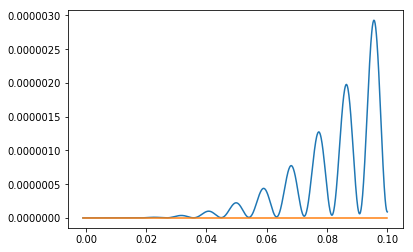

In [588]:
plt.plot(tlist, output.expect[0])
plt.plot(tlist, output.expect[1])

In [526]:
psi0 = qutrit.basis_states[0]
times = np.linspace(-0.1,1.6,3000)
output1, output2 = basic_qubit_drive.solve_dynamics(psi0 = psi0, t = times, **params)
fidelities = [qt.fidelity(output2.states[ind], output1.states[ind]) for ind in range(len(output2.states))]

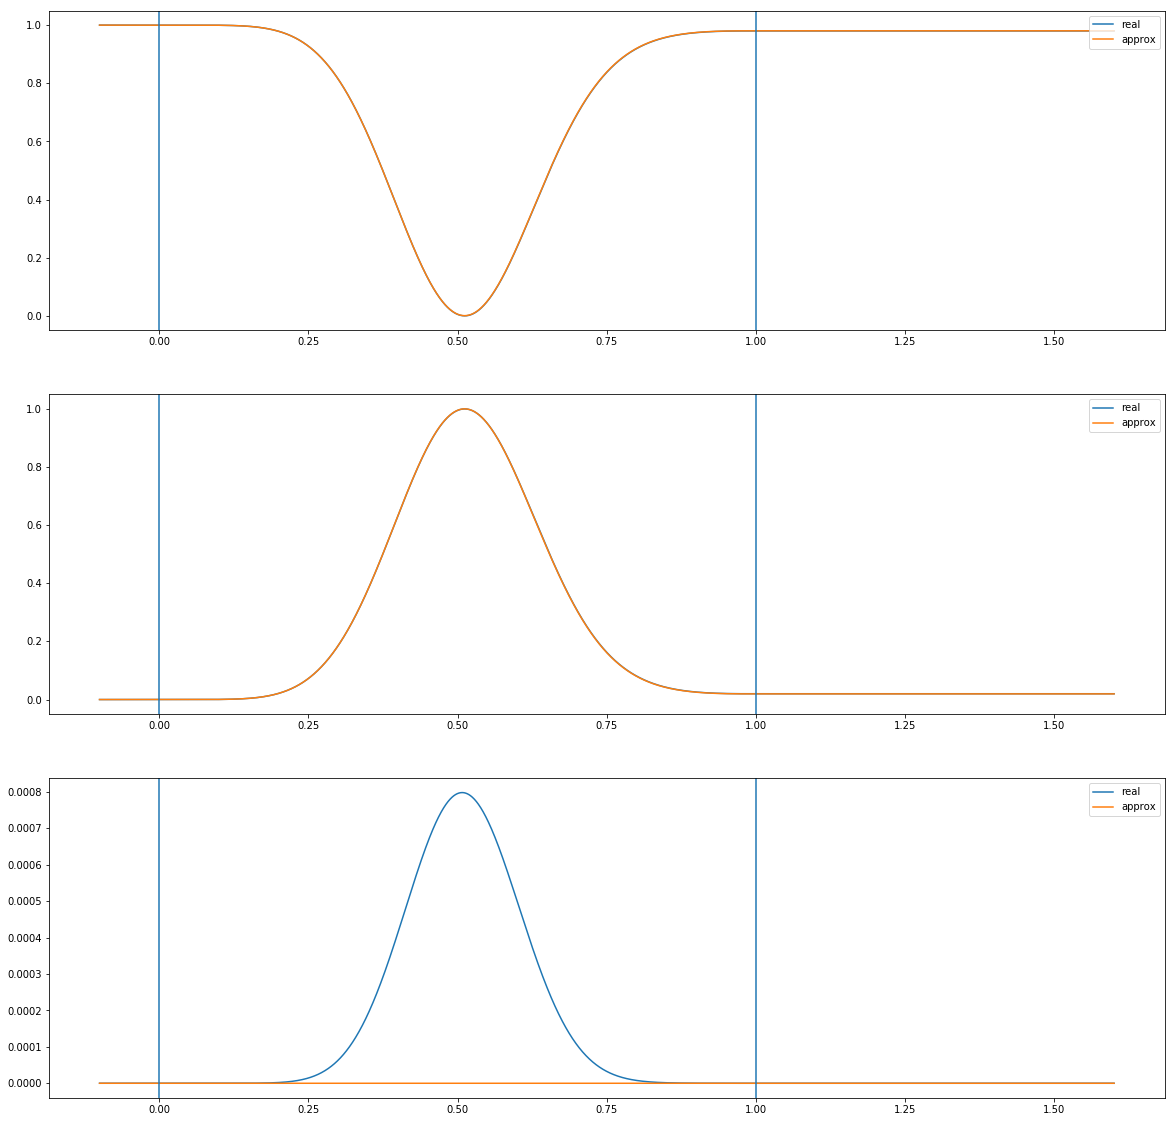

In [527]:
plt.figure(figsize = (20,20))
for state in [0,1,2]:
    plt.subplot(3,1,state+1)
    plt.plot(times, (np.array(output1.expect).T)[:,state], label = 'real')
    plt.plot(times, (np.array(output2.expect).T)[:,state], label = 'approx')
    plt.legend(loc = 1)
    plt.axvline(0)
    plt.axvline(t_pulse)
# plt.xlim(-0.1,0)

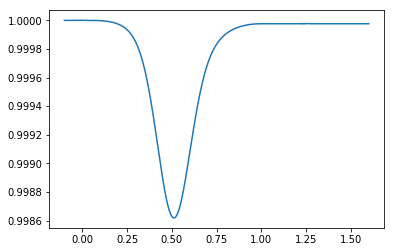

In [528]:
plt.plot(times, fidelities)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


(0, 5)

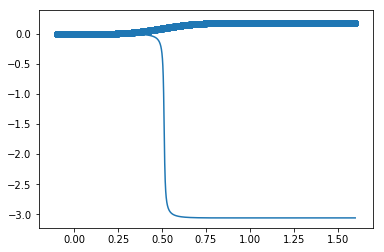

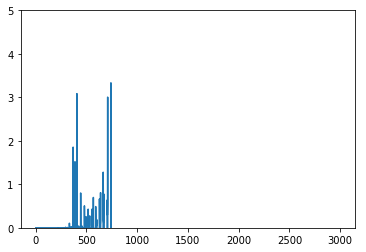

In [529]:
# output1_phases = np.unwrap([np.angle(output1.states[i][2])[0][0]  for i in range(len(output1.states))])
output2_phases = np.unwrap([np.angle(output2.states[i][2])[0][0]  for i in range(len(output2.states))])
output2_phases = np.unwrap([np.angle(output2.states[i][0])[0][0]  for i in range(len(output2.states))])

bare_phases = -params['alpha'] * (times - times[0])

# output1_phases = output1_phases - bare_phases
# output2_phases = output2_phases - bare_phases
analytic_phases = [stark_shift(t,params) for t in times]
# plt.plot(times, output1_phases)
plt.plot(times, output2_phases)
plt.scatter(times, analytic_phases)

plt.figure()
plt.plot(np.array(output2_phases)/np.array(output1_phases))
plt.ylim(0,5)

In [496]:
output1_phases + output2_phases

array([  0.00000000e+00,  -2.49482852e-07,  -4.98965728e-07,
        -7.48448594e-07,  -9.97931463e-07,  -1.24741432e-06,
        -1.49689720e-06,  -1.74638007e-06,  -1.99586292e-06,
        -2.24534577e-06,  -2.49482860e-06,  -2.74431145e-06,
        -2.99379431e-06,  -3.24327718e-06,  -3.49276004e-06,
        -3.74224295e-06,  -3.99172581e-06,  -4.24120870e-06,
        -4.49069158e-06,  -4.74017444e-06,  -4.98965735e-06,
        -5.23914024e-06,  -5.48862312e-06,  -5.73810600e-06,
        -5.98758886e-06,  -6.23707174e-06,  -6.48655461e-06,
        -6.73603751e-06,  -6.98552040e-06,  -7.23500327e-06,
        -7.48448615e-06,  -7.73396903e-06,  -7.98345192e-06,
        -8.23293482e-06,  -8.48241773e-06,  -8.73190062e-06,
        -8.98138352e-06,  -9.23086642e-06,  -9.48034930e-06,
        -9.72983220e-06,  -9.97931510e-06,  -1.02287980e-05,
        -1.04782809e-05,  -1.07277638e-05,  -1.09772467e-05,
        -1.12267296e-05,  -1.14762125e-05,  -1.17256954e-05,
        -1.19751783e-05,

In [464]:
def stark_shift(t, params):
    integrand = lambda x: (np.power(params['lambda_t'],2)+2)/(4*params['alpha'])*np.power(params['eps_x_fun'](x),2)
    return -integrate.quad(integrand, 0, t)[0]

In [425]:
analytic_phases

[(0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (-2.4059296303587784e-17, 2.6711184712522078e-31),
 (-9.595569287627414e-14, 1.0653221957509965e-27),
 (-1.8615372964933853e-12, 2.066721567765423e-26),
 (-1.1823195524363593e-11, 1.3126383895793562e-25),
 (-4.545061358355546e-11, 5

In [541]:
from src import hamiltonians

In [543]:
[H, a1, a2, x1, x2] = hamiltonians.H_two_transmons(5, -0.3, 4.85, -0.3, 0.01, 4)

Quantum object: dims = [[4, 4], [4, 4]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 0.          0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 1.          0.          0.          0.          0.          0.          0.
   0.          1.41421356  0.          0.          0.          0.          0.
   0.         